In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('combined_traj_data.csv')

In [ ]:
# Feature engineering
df['speed'] = np.sqrt(df['vx']**2 + df['vy']**2)
df['heading'] = np.arctan2(df['vy'], df['vx'])
df['accel'] = df['speed'].diff() / df['t'].diff()
df['turn_rate'] = df['heading'].diff() / df['t'].diff()
df['distance'] = np.sqrt(df['x'].diff()**2 + df['y'].diff()**2)

features = df[['speed', 'heading', 'accel', 'turn_rate', 'distance']]
features_traj_number = df[['speed', 'heading', 'accel', 'turn_rate', 'distance','x', 'y', 't','traj_number']]
features['accel'].fillna(0, inplace=True)
features['turn_rate'].fillna(0, inplace=True)
features['distance'].fillna(0, inplace=True)

In [ ]:
features_traj = df[['speed', 'heading', 'accel', 'turn_rate', 'distance','x', 'y', 't']]
features_traj_traj_number = df[['speed', 'heading', 'accel', 'turn_rate', 'distance','x', 'y', 't','traj_number']]
features_traj['accel'].fillna(0, inplace=True)
features_traj['turn_rate'].fillna(0, inplace=True)
features_traj['distance'].fillna(0, inplace=True)
features_traj_traj_number['accel'].fillna(0, inplace=True)
features_traj_traj_number['turn_rate'].fillna(0, inplace=True)
features_traj_traj_number['distance'].fillna(0, inplace=True)

In [4]:
cluster_features = df[['x', 'y', 't']]
cluster_features_traj_number = df[['x', 'y', 't','traj_number']]

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor()
y_pr = lof.fit_predict(cluster_features)

In [6]:
inlier_indices = y_pr == 1
features_no_outliers = cluster_features[inlier_indices]
features_no_outliers = features_no_outliers.reset_index(drop=True)
features_no_outliers_num_traj = cluster_features_traj_number[inlier_indices]
features_no_outliers_num_traj = features_no_outliers_num_traj.reset_index(drop=True)

In [ ]:
kmeans = KMeans(n_clusters=5)
features_no_outliers['cluster_kmeans'] = kmeans.fit_predict(features_no_outliers)
cluster_list = features_no_outliers['cluster_kmeans'].tolist()
normal_cluster = max(set(cluster_list), key=cluster_list.count)

In [8]:
features_no_outliers_num_traj['cluster_kmeans'] = np.where(features_no_outliers['cluster_kmeans'] == normal_cluster, 1, 0)

In [9]:
features_no_outliers_num_traj.head()

x          y    t  traj_number  cluster_kmeans
0 -5.945927  48.405752    0            1               1
1 -5.943545  48.409463   63            1               1
2 -5.942630  48.410908   85            1               1
3 -5.941725  48.412282  114            1               1
4 -5.938982  48.416620  180            1               1

In [10]:
normal_df = features_no_outliers_num_traj[features_no_outliers_num_traj['cluster_kmeans'] == 1]

In [18]:
unnormal_df = features_no_outliers_num_traj[features_no_outliers_num_traj['cluster_kmeans'] == 0]

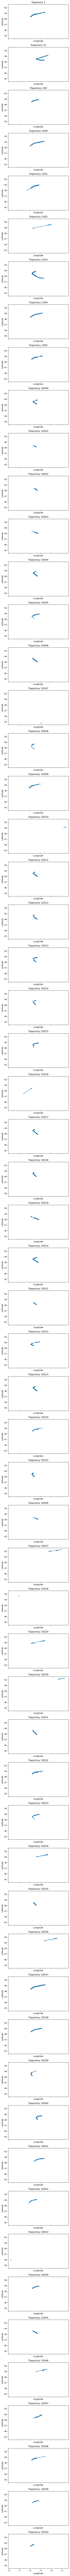

In [20]:
import matplotlib.pyplot as plt

features_subset = normal_df[:10000]

# Get number of unique trajectories
num_traj = features_subset['traj_number'].nunique()

# Create figure with subplots
if num_traj == 1:
    fig, axs = plt.subplots(figsize=(5, 3))
    axs = [axs]  # Convert single Axes to a list for consistency
else:
    fig, axs = plt.subplots(num_traj, 1, figsize=(5, num_traj * 3), sharex=True, sharey=True)

# Plot each trajectory in its own subplot
for i, (traj_num, traj) in enumerate(features_subset.groupby('traj_number')):

    axs[i].plot(traj['x'], traj['y'], marker='.', linestyle='-')
    axs[i].set_title(f'Trajectory {traj_num}')
    axs[i].set_xlabel('Longitude')
    axs[i].set_ylabel('Latitude')

fig.tight_layout()
plt.show()

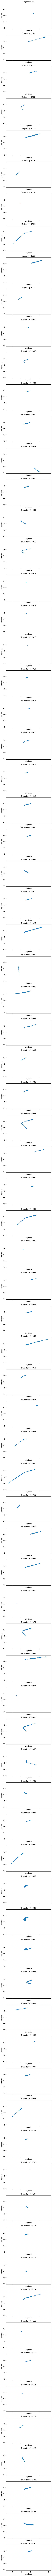

In [21]:
import matplotlib.pyplot as plt

features_subset = unnormal_df[:10000]

# Get number of unique trajectories
num_traj = features_subset['traj_number'].nunique()

# Create figure with subplots
if num_traj == 1:
    fig, axs = plt.subplots(figsize=(5, 3))
    axs = [axs]  # Convert single Axes to a list for consistency
else:
    fig, axs = plt.subplots(num_traj, 1, figsize=(5, num_traj * 3), sharex=True, sharey=True)

# Plot each trajectory in its own subplot
for i, (traj_num, traj) in enumerate(features_subset.groupby('traj_number')):

    axs[i].plot(traj['x'], traj['y'], marker='.', linestyle='-')
    axs[i].set_title(f'Trajectory {traj_num}')
    axs[i].set_xlabel('Longitude')
    axs[i].set_ylabel('Latitude')

fig.tight_layout()
plt.show()

In [5]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor()
y_pr = lof.fit_predict(features_traj)

In [6]:
inlier_indices = y_pr == 1
features_no_outliers = features_traj[inlier_indices]
features_no_outliers = features_no_outliers.reset_index(drop=True)
features_no_outliers_num_traj = features_traj_traj_number[inlier_indices]
features_no_outliers_num_traj = features_no_outliers_num_traj.reset_index(drop=True)

In [7]:
kmeans = KMeans(n_clusters=5)
features_no_outliers['cluster_kmeans'] = kmeans.fit_predict(features_no_outliers)
cluster_list = features_no_outliers['cluster_kmeans'].tolist()
normal_cluster = max(set(cluster_list), key=cluster_list.count)

D:\softswar\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [8]:
features_no_outliers_num_traj['cluster_kmeans'] = np.where(features_no_outliers['cluster_kmeans'] == normal_cluster, 1, 0)

In [9]:
features_no_outliers_num_traj.head()

speed   heading     accel     turn_rate  distance         x          y  \
0   14.0  1.186824 -0.001587 -2.819614e-17  0.004410 -5.943545  48.409463   
1   14.1  1.186824  0.004545  8.074349e-17  0.001710 -5.942630  48.410908   
2   14.0  1.186824 -0.003448 -6.125368e-17  0.001645 -5.941725  48.412282   
3   14.0  1.186824  0.000000  0.000000e+00  0.005133 -5.938982  48.416620   
4   14.0  1.186824  0.000000  0.000000e+00  0.006496 -5.935568  48.422147   

     t  traj_number  cluster_kmeans  
0   63            1               1  
1   85            1               1  
2  114            1               1  
3  180            1               1  
4  272            1               1

In [10]:
normal_df = features_no_outliers_num_traj[features_no_outliers_num_traj['cluster_kmeans'] == 1]

In [11]:
unnormal_df = features_no_outliers_num_traj[features_no_outliers_num_traj['cluster_kmeans'] == 0]

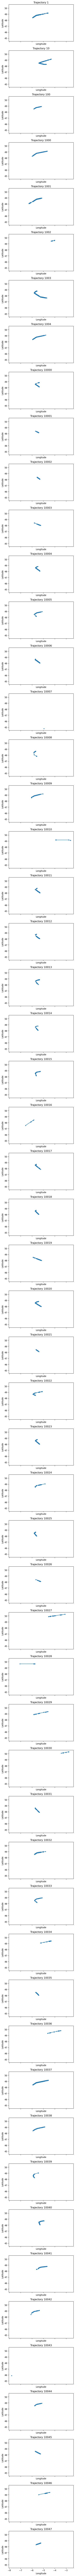

In [12]:
import matplotlib.pyplot as plt

features_subset = normal_df[:10000]

# Get number of unique trajectories
num_traj = features_subset['traj_number'].nunique()

# Create figure with subplots
if num_traj == 1:
    fig, axs = plt.subplots(figsize=(5, 3))
    axs = [axs]  # Convert single Axes to a list for consistency
else:
    fig, axs = plt.subplots(num_traj, 1, figsize=(5, num_traj * 3), sharex=True, sharey=True)

# Plot each trajectory in its own subplot
for i, (traj_num, traj) in enumerate(features_subset.groupby('traj_number')):

    axs[i].plot(traj['x'], traj['y'], marker='.', linestyle='-')
    axs[i].set_title(f'Trajectory {traj_num}')
    axs[i].set_xlabel('Longitude')
    axs[i].set_ylabel('Latitude')

fig.tight_layout()
plt.show()

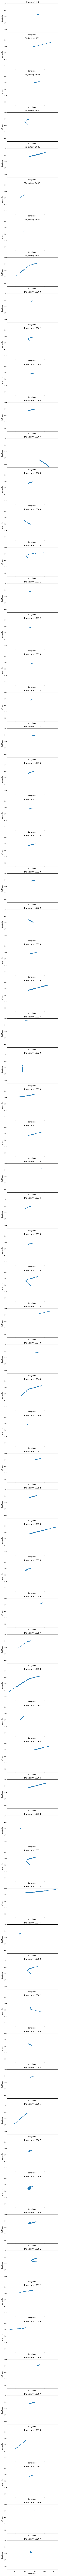

In [13]:
import matplotlib.pyplot as plt

features_subset = unnormal_df[:10000]

# Get number of unique trajectories
num_traj = features_subset['traj_number'].nunique()

# Create figure with subplots
if num_traj == 1:
    fig, axs = plt.subplots(figsize=(5, 3))
    axs = [axs]  # Convert single Axes to a list for consistency
else:
    fig, axs = plt.subplots(num_traj, 1, figsize=(5, num_traj * 3), sharex=True, sharey=True)

# Plot each trajectory in its own subplot
for i, (traj_num, traj) in enumerate(features_subset.groupby('traj_number')):

    axs[i].plot(traj['x'], traj['y'], marker='.', linestyle='-')
    axs[i].set_title(f'Trajectory {traj_num}')
    axs[i].set_xlabel('Longitude')
    axs[i].set_ylabel('Latitude')

fig.tight_layout()
plt.show()

In [5]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
y_pr = lof.fit_predict(features)

In [6]:
inlier_indices = y_pr == 1
features_no_outliers = features[inlier_indices]
features_no_outliers = features_no_outliers.reset_index(drop=True)
features_no_outliers_num_traj = features_traj_number[inlier_indices]
features_no_outliers_num_traj = features_no_outliers_num_traj.reset_index(drop=True)

In [ ]:
kmeans = KMeans(n_clusters=5)
features_no_outliers['cluster_kmeans'] = kmeans.fit_predict(features_no_outliers)
cluster_list = features_no_outliers['cluster_kmeans'].tolist()
normal_cluster = max(set(cluster_list), key=cluster_list.count)

In [8]:
features_no_outliers_num_traj['cluster_kmeans'] = np.where(features_no_outliers['cluster_kmeans'] == normal_cluster, 1, 0)

In [10]:
normal_df = features_no_outliers_num_traj[features_no_outliers_num_traj['cluster_kmeans'] == 1]

In [11]:
unnormal_df = features_no_outliers_num_traj[features_no_outliers_num_traj['cluster_kmeans'] == 0]

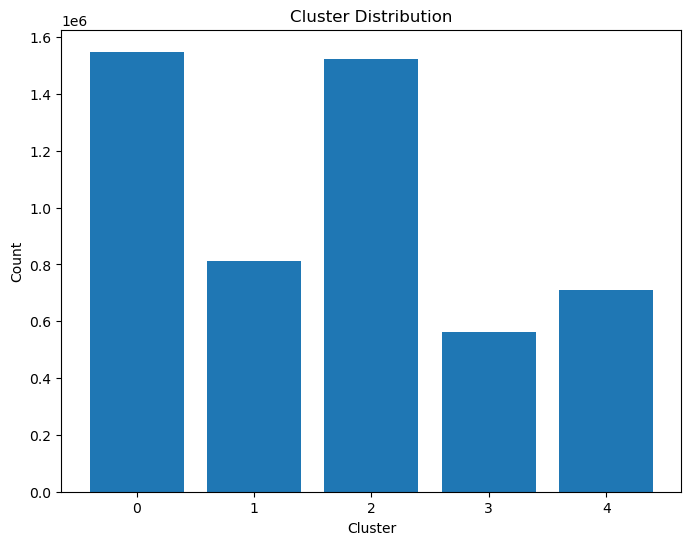

In [15]:
import matplotlib.pyplot as plt
# Count the occurrences of each cluster
cluster_counts = features_no_outliers['cluster_kmeans'].value_counts()

# Create a bar chart to visualize the cluster distribution
plt.figure(figsize=(8, 6))
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Cluster Distribution')
plt.xticks(cluster_counts.index)
plt.show()

In [9]:
features_no_outliers_num_traj.head()

speed   heading     accel     turn_rate  distance         x          y  \
0   14.1  1.186824  0.004545  8.074349e-17  0.001710 -5.942630  48.410908   
1   14.1  1.186824  0.000327  5.805088e-18  0.021769 -5.924070  48.440632   
2   14.1  1.186824  0.000000  0.000000e+00  0.000922 -5.923597  48.441423   
3   14.1  1.186824  0.000000  0.000000e+00  0.000428 -5.923377  48.441790   
4   14.1  1.186824  0.000000  0.000000e+00  0.001717 -5.922477  48.443252   

     t  traj_number  cluster_kmeans  
0   85            1               0  
1  578            1               0  
2  589            1               0  
3  595            1               0  
4  618            1               0

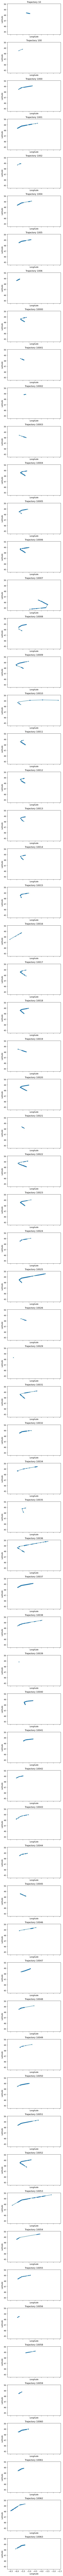

In [17]:
import matplotlib.pyplot as plt

features_subset = normal_df[:10000]

# Get number of unique trajectories
num_traj = features_subset['traj_number'].nunique()

# Create figure with subplots
if num_traj == 1:
    fig, axs = plt.subplots(figsize=(5, 3))
    axs = [axs]  # Convert single Axes to a list for consistency
else:
    fig, axs = plt.subplots(num_traj, 1, figsize=(5, num_traj * 3), sharex=True, sharey=True)

# Plot each trajectory in its own subplot
for i, (traj_num, traj) in enumerate(features_subset.groupby('traj_number')):

    axs[i].plot(traj['x'], traj['y'], marker='.', linestyle='-')
    axs[i].set_title(f'Trajectory {traj_num}')
    axs[i].set_xlabel('Longitude')
    axs[i].set_ylabel('Latitude')

fig.tight_layout()
plt.show()

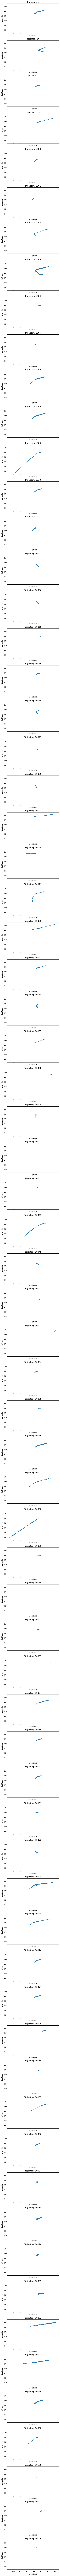

In [18]:
import matplotlib.pyplot as plt

features_subset = unnormal_df[:10000]

# Get number of unique trajectories
num_traj = features_subset['traj_number'].nunique()

# Create figure with subplots
if num_traj == 1:
    fig, axs = plt.subplots(figsize=(5, 3))
    axs = [axs]  # Convert single Axes to a list for consistency
else:
    fig, axs = plt.subplots(num_traj, 1, figsize=(5, num_traj * 3), sharex=True, sharey=True)

# Plot each trajectory in its own subplot
for i, (traj_num, traj) in enumerate(features_subset.groupby('traj_number')):

    axs[i].plot(traj['x'], traj['y'], marker='.', linestyle='-')
    axs[i].set_title(f'Trajectory {traj_num}')
    axs[i].set_xlabel('Longitude')
    axs[i].set_ylabel('Latitude')

fig.tight_layout()
plt.show()